In [1]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC

iris = load_iris(as_frame=True)
X = iris.data[["petal length (cm)", "petal width (cm)"]].values
y = (iris.target==2)

svm_clf = make_pipeline(StandardScaler(), 
                        LinearSVC(C=1, random_state=42))
svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('linearsvc', LinearSVC(C=1, random_state=42))])

In [2]:
X_new = [[5.5, 2.7], [5.0, 1.5]]
svm_clf.predict(X_new)

array([ True, False])

In [3]:
svm_clf.decision_function(X_new)

array([ 2.90887886, -0.22036063])

In [4]:
from sklearn.datasets import make_moons
from sklearn.preprocessing import PolynomialFeatures

X, y = make_moons(n_samples=100, noise=0.15, random_state=42)

polynomial_svm_clf = make_pipeline(
    PolynomialFeatures(degree=3),
    StandardScaler(),
    LinearSVC(C=10, max_iter=10000, random_state=42)
)
polynomial_svm_clf.fit(X, y)
polynomial_svm_clf['linearsvc'].coef_

array([[ 0.        , -0.90253479, -0.3728471 , -4.19321923, -0.49846487,
         0.68212693,  6.58255005, -0.50824401,  0.77497688, -2.14418599]])

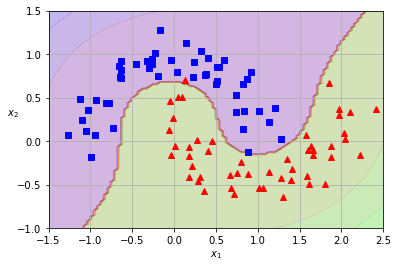

In [5]:
import matplotlib.pyplot as plt
import numpy as np

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], 'bs')
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], 'r^')
    plt.axis(axes)
    plt.grid(True)
    plt.xlabel("$x_1$")
    plt.ylabel("$x_2$", rotation=0)

def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s,x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0,x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

axes = [-1.5, 2.5, -1, 1.5]
plot_predictions(polynomial_svm_clf, axes)
plot_dataset(X, y, axes)



In [6]:
from sklearn.svm import SVC

poly_kernal_svc_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="poly", degree=3, coef0=1, C=5)
)
poly_kernal_svc_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=5, coef0=1, kernel='poly'))])

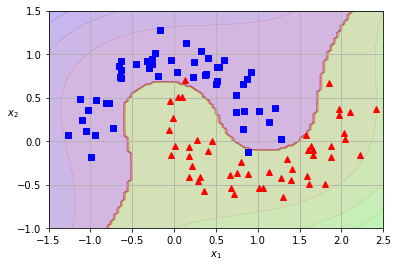

In [7]:
plot_predictions(poly_kernal_svc_clf, axes)
plot_dataset(X,y,axes)

In [10]:
# With Gaussian RBF Kernal

rbf_kernal_svm_clf = make_pipeline(
    StandardScaler(),
    SVC(kernel="rbf", gamma=5, C=0.001)
)

rbf_kernal_svm_clf.fit(X,y)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(C=0.001, gamma=5))])

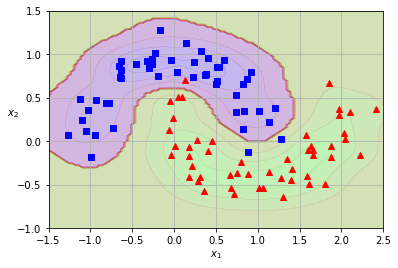

In [11]:
plot_dataset(X, y, axes)
plot_predictions(rbf_kernal_svm_clf, axes)